## This script contains the following:
### Importing libraries and data and renaming columns
### The elbow technique
### k-means clustering

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\charan.lalwani\Documents\cf\Achievement 6\New york citi bikes\Data\Prepared Data\df_reg_analysis.csv", index_col = False)

In [4]:
df.shape

(49970, 22)

In [5]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,age_group,start_date,start_time_of_day
0,LnQzQk,16013,Monday,18,2013-09-09 18:18:00,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:00,...,40.742388,-73.997262,993,Subscriber,1968.0,2,56.0,56-65,2013-09-09,18:18:00
1,IL9boN,15230,Thursday,18,2013-09-12 18:38:00,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:00,...,40.728419,-73.987140,581,Subscriber,1983.0,1,41.0,36-45,2013-09-12,18:38:00
2,46clGB,17942,Wednesday,19,2013-09-18 19:44:00,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:00,...,40.768254,-73.988639,361,Subscriber,1989.0,1,35.0,36-45,2013-09-18,19:44:00
3,v7vdFt,19683,Saturday,11,2013-09-28 11:54:00,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:00,...,40.756014,-73.967416,561,Subscriber,1988.0,2,36.0,36-45,2013-09-28,11:54:00
4,VGBsb5,18024,Saturday,18,2013-09-07 18:08:00,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:00,...,40.743943,-73.979661,2296,Non-Subscriber,1985.0,Not Available,39.0,36-45,2013-09-07,18:08:00


In [12]:
#rides per day
day_count = df.groupby('weekday')['start_date'].count()

In [13]:
day_count

weekday
Friday       7307
Monday       7712
Saturday     6505
Sunday       7314
Thursday     6847
Tuesday      7061
Wednesday    7224
Name: start_date, dtype: int64

In [14]:
#avg trip duration by day
day_avg_duration = df.groupby('weekday')['trip_duration'].mean()

In [ ]:
#merging DF together
result = pd.DataFrame({'weekday': day_count.index, 'ride_count': day_counts.values, 'avg_duration': day_avg_duration.valu

In [16]:
#merging DF together
result = pd.DataFrame({'weekday': day_count.index, 'ride_count': day_count.values, 'avg_duration': day_avg_duration})

In [17]:
result

,weekday,ride_count,avg_duration
weekday,,,
Friday,Friday,7307,808.349117
Monday,Monday,7712,819.061981
Saturday,Saturday,6505,931.262875
Sunday,Sunday,7314,936.312825
Thursday,Thursday,6847,787.201986
Tuesday,Tuesday,7061,790.940943
Wednesday,Wednesday,7224,805.311600


In [43]:
# avg age of rider by day
day_avg_age = df.groupby('weekday')['birth_year'].mean()

In [44]:
day_avg_age

weekday
Friday       1976.399891
Monday       1976.510892
Saturday     1978.872560
Sunday       1978.841947
Thursday     1976.046152
Tuesday      1976.067979
Wednesday    1976.247370
Name: birth_year, dtype: float64

In [46]:
#merging it together
result_1 = pd.DataFrame({'weekday': day_count.index, 'ride_count': day_count.values, 'avg_duration': day_avg_duration,'avg_age' : day_avg_age.values})

In [47]:
result_1

,weekday,ride_count,avg_duration,avg_age
weekday,,,,
Friday,Friday,7307,808.349117,1976.399891
Monday,Monday,7712,819.061981,1976.510892
Saturday,Saturday,6505,931.262875,1978.872560
Sunday,Sunday,7314,936.312825,1978.841947
Thursday,Thursday,6847,787.201986,1976.046152
Tuesday,Tuesday,7061,790.940943,1976.067979
Wednesday,Wednesday,7224,805.311600,1976.247370


In [48]:
#rides per hour
hour_count_1 = df.groupby('start_hour')['start_date'].count()

In [49]:
hour_count_1

start_hour
0      522
1      330
2      194
3      120
4       89
5      208
6      911
7     2037
8     3283
9     2811
10    2165
11    2272
12    2897
13    2977
14    3002
15    3129
16    3790
17    5066
18    4868
19    3302
20    2207
21    1536
22    1322
23     932
Name: start_date, dtype: int64

In [50]:
# avg trip duration by hour
hour_avg_duration = df.groupby('start_hour')['trip_duration'].mean()

In [51]:
hour_avg_duration

start_hour
0     818.139847
1     817.136364
2     760.989691
3     745.958333
4     735.662921
5     642.836538
6     659.232711
7     739.270987
8     777.958879
9     767.065813
10    835.639261
11    869.185299
12    845.470832
13    860.810212
14    900.864091
15    898.646532
16    909.187071
17    874.612515
18    873.211380
19    821.495457
20    821.523335
21    800.775391
22    790.218608
23    785.373391
Name: trip_duration, dtype: float64

In [52]:
#merging together
hour_result = pd.DataFrame({'start_hour': hour_count_1.index, 'ride_count': hour_count_1.values, 'avg_duration': hour_avg_duration.values})

In [53]:
hour_result

,start_hour,ride_count,avg_duration
0,0,522,818.139847
1,1,330,817.136364
2,2,194,760.989691
3,3,120,745.958333
4,4,89,735.662921
5,5,208,642.836538
6,6,911,659.232711
7,7,2037,739.270987
8,8,3283,777.958879
9,9,2811,767.065813


 ### The elbow technique

In [6]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [59]:
score = [kmeans[i].fit(hour_result).score(hour_result) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

[-50599516.20837127,
 -13728608.360807369,
 -5843698.7588944305,
 -2365325.731583163,
 -1204463.340928692,
 -730370.7209296315,
 -467408.11683771654,
 -295746.68007930624,
 -183821.7790442644]

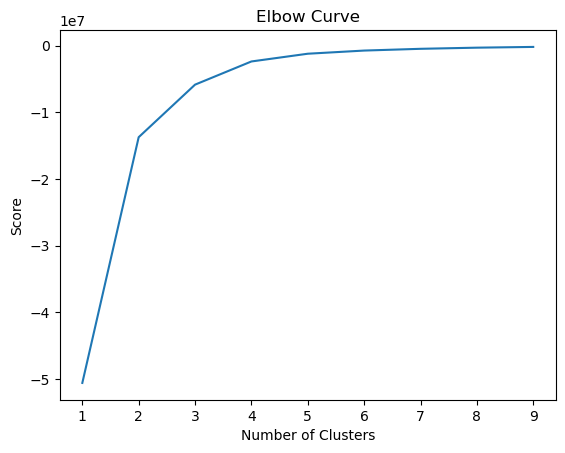

In [60]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### In this example, there's a large jump from two to three  and another one from three to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

### k-means clustering

In [61]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [63]:
# Fit the k-means object to the data.

kmeans.fit(hour_result)

C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [65]:
hour_result['clusters'] = kmeans.fit_predict(hour_result)

C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [66]:
hour_result.head()

,start_hour,ride_count,avg_duration,clusters
0,0,522,818.139847,1
1,1,330,817.136364,1
2,2,194,760.989691,1
3,3,120,745.958333,1
4,4,89,735.662921,1


In [67]:
hour_result['clusters'].value_counts()

clusters
1    8
3    8
0    6
2    2
Name: count, dtype: int64

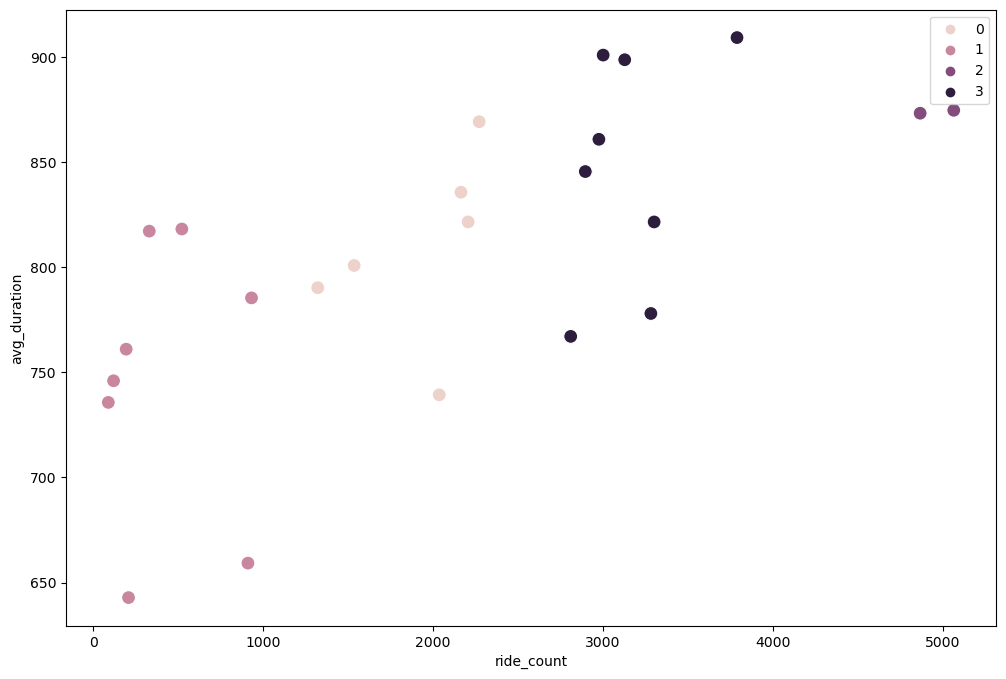

In [69]:
# ride count and avg duration
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=hour_result['ride_count'], y=hour_result['avg_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ride_count') # Label x-axis.
plt.ylabel('avg_duration') # Label y-axis.
plt.show()

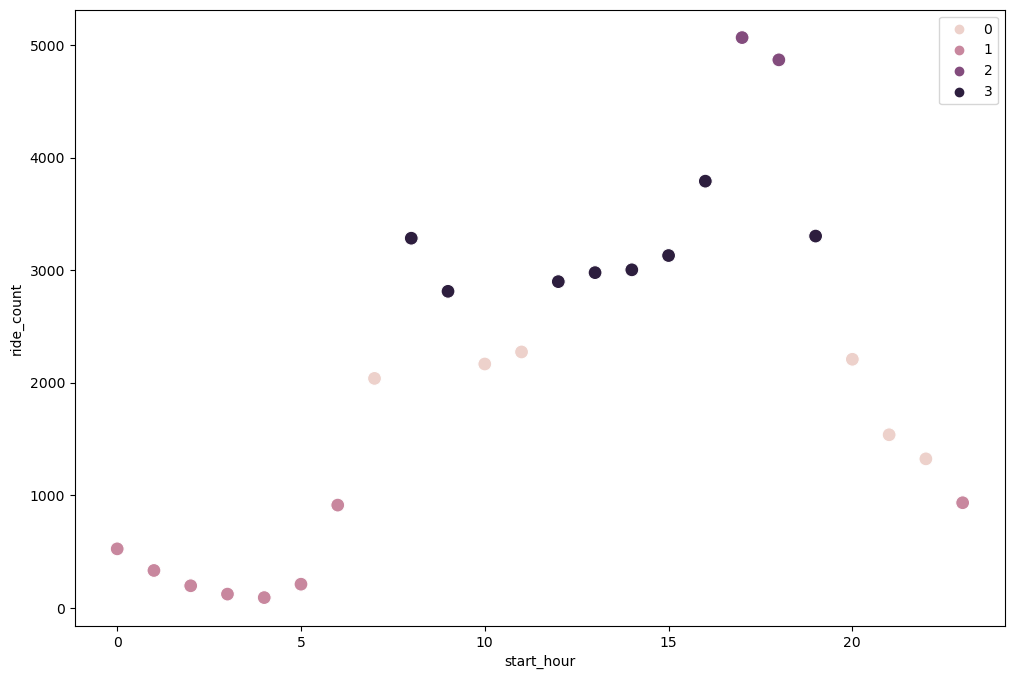

In [70]:
# start hour and ride count
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=hour_result['start_hour'], y=hour_result['ride_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_hour') # Label x-axis.
plt.ylabel('ride_count') # Label y-axis.
plt.show()

### According to this, it shows the use of citi bikes starts shwoing a rise from 6 am onwards and drops around 10 am, subsequently goes up and is high around 5- 6pm with again showing a downward trend.

In [71]:
df.to_csv(os.path.join(r"C:\Users\charan.lalwani\Documents\cf\Achievement 6\New york citi bikes\Data\Prepared Data" ,"df_machine_learning.csv"), index=False)